<a href="https://colab.research.google.com/github/venky9885/ML_logistic-regression-on-advertising-Data-set/blob/main/Ml_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising (1).csv


In [121]:
import io
df = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

In [122]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [123]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = pd.DatetimeIndex(df['Timestamp']).year

df['Month'] = pd.DatetimeIndex(df['Timestamp']).month

In [124]:
df.drop(['Timestamp'],axis=1 ).head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Year,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,2016,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,2016,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,2016,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2016,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,2016,6


In [125]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Year', 'Month'],
      dtype='object')

In [126]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Year,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,2016.0,3.817000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,0.0,1.926973
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,2016.0,1.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,2016.0,2.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,2016.0,4.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,2016.0,5.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,2016.0,7.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Year                      1000 non-null   int64         
 11  Month                     1000 non-null   int64         
dtypes: datetime64[ns](1),

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


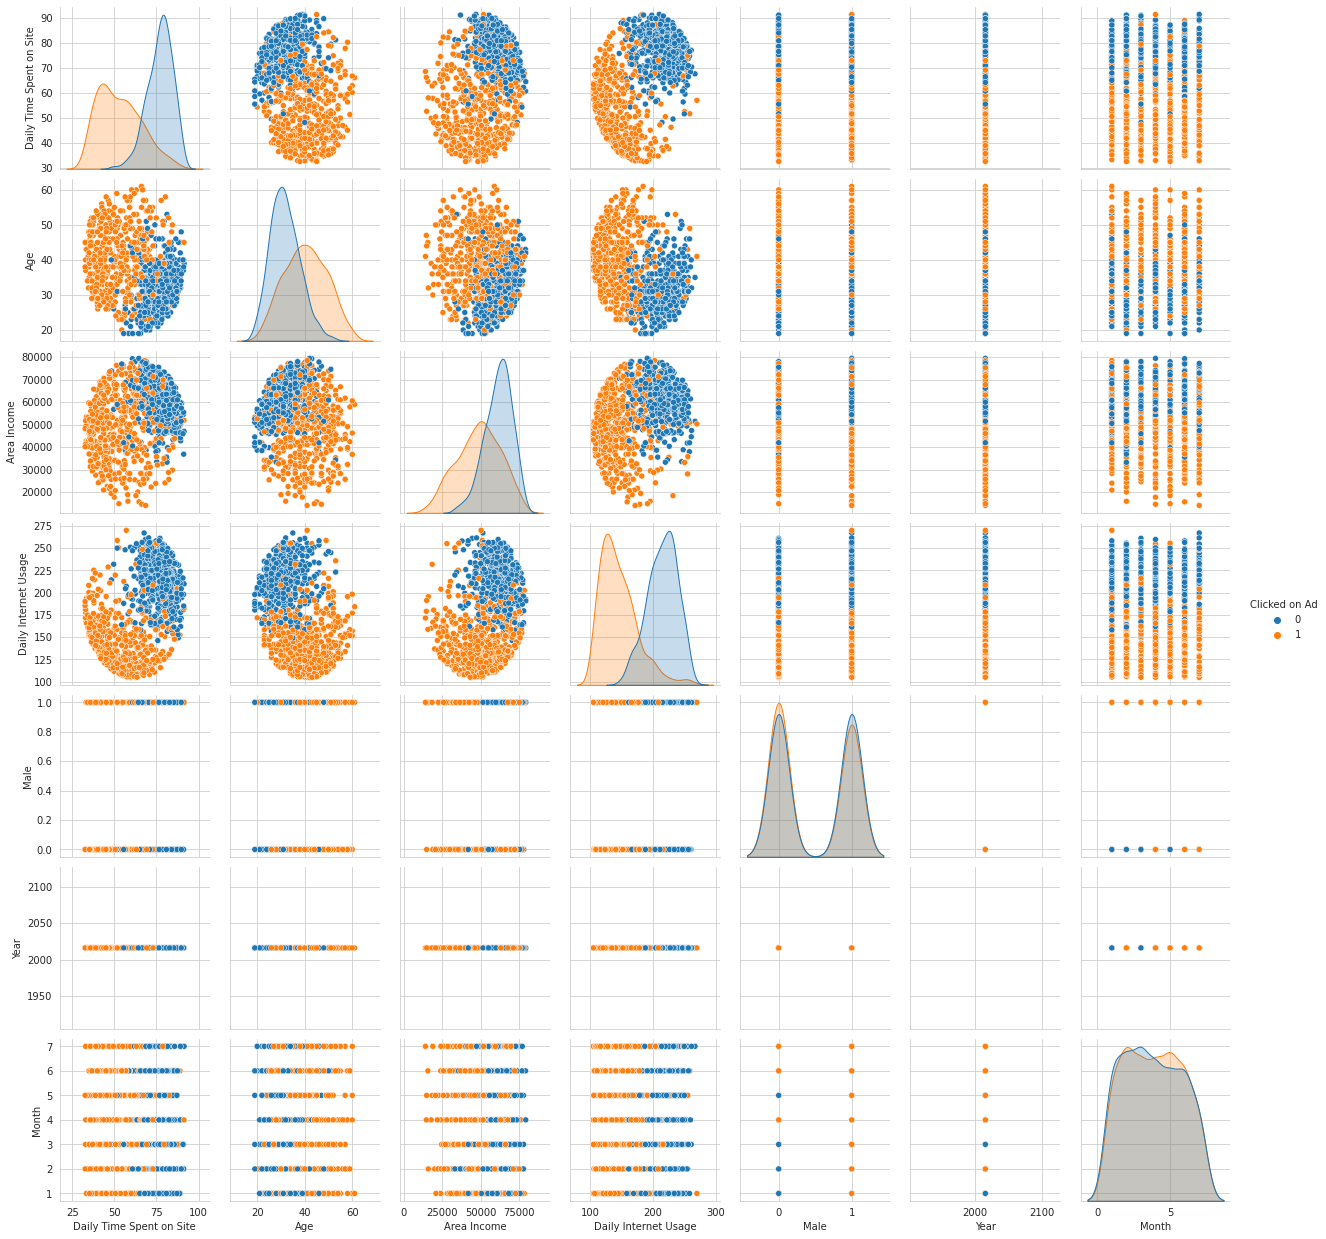

In [128]:
sns.pairplot(df,hue='Clicked on Ad')

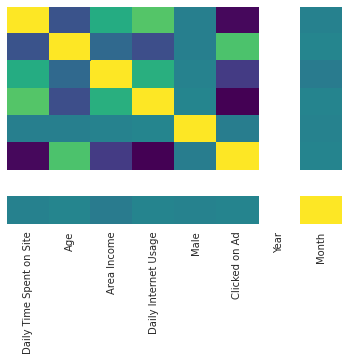

In [129]:
sns.heatmap(df.corr(),yticklabels=False,cbar=False,cmap='viridis')

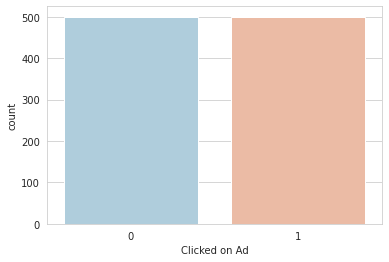

In [130]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',data=df,palette='RdBu_r')

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Clicked on Ad','Timestamp','Country','City','Ad Topic Line'],axis=1), 
                                                    df['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

In [133]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Year,Month
290,50.52,31,72270.88,171.62,0,2016,1
167,86.06,31,53767.12,219.72,1,2016,4
486,83.97,40,66291.67,158.42,1,2016,2
683,76.83,28,67990.84,192.81,0,2016,3
876,67.39,44,51257.26,107.19,0,2016,1
...,...,...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0,2016,1
838,44.13,40,33601.84,128.48,1,2016,3
337,75.32,28,59998.50,233.60,1,2016,1
523,67.94,43,68447.17,128.16,0,2016,5


In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
reg = LogisticRegression()

In [136]:
reg.fit(X_train.values,y_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
pred = reg.predict(X_test)

In [138]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [139]:
 iu = pd.DataFrame(y_test).reset_index()
 pu = iu.drop(['index'],axis=1).head()

In [146]:
yes  = pd.concat([pu,pd.DataFrame(pred,columns=['Tru'])],axis=1)
yes.head()

,Clicked on Ad,Tru
0,1.0,1
1,0.0,0
2,0.0,0
3,1.0,1
4,0.0,0


In [147]:
print(confusion_matrix(y_test,pred))

[[155   2]
 [  5 138]]


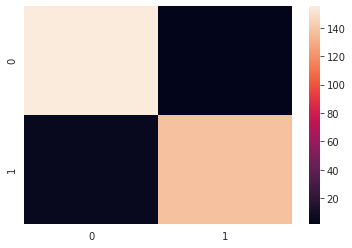

In [148]:
sns.heatmap(confusion_matrix(y_test,pred))